<a href="https://colab.research.google.com/github/CamiloLoaiza12/Analitica2_trabajo1/blob/main/Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importar datos
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
## Remove Warnings
import warnings
warnings.filterwarnings("ignore")

## Data
import pandas as pd
import numpy as np
from itertools import product

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

## Modelling
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score, classification_report
import math

In [ ]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline

In [ ]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

DESCRIPCION DE LAS VARIABLES

# IMPORTACION DE DATOS

In [ ]:
infogeneral = pd.read_csv('general_data.csv', sep = ",")
infogeneral

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8


In [ ]:
encuesta_satisfaccion = pd.read_csv("employee_survey_data.csv", sep = ",")
encuesta_satisfaccion.head(5)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


# MODELO BASE CON TODAS LAS VARIABLES

### VARIABLES ORDINALES A STRING

In [ ]:
tablabase=tabla.copy()
tablabase.frecuencia_viajes=tablabase.frecuencia_viajes.astype(str)
tablabase.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores              float64
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones              int64
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

In [ ]:
tablabase=tabla.copy()
columnascategoricas=["numero_capacitaciones","empresas_anteriores"]
tablabase[columnascategoricas] = tablabase[columnascategoricas].astype(str)
tablabase.dtypes

edad                               int64
desercion_año_anterior            object
frecuencia_viajes                 object
departamento                      object
distancia_domicilio                int64
educacion                          int64
formacion                         object
genero                            object
nivel_de_cargo                     int64
nombre_cargo                      object
estado_civil                      object
ingresos_mensuales                 int64
empresas_anteriores               object
porcentaje_aumentosalario          int64
nivel_de_opciones                  int64
años_de_trabajo                  float64
numero_capacitaciones             object
años_empresa                       int64
años_desde_acenso                  int64
años_jefe_actual                   int64
satisfaccion_entorno             float64
satisfaccion_laboral             float64
conciliacion_faimilar_laboral    float64
implicacion_laboral                int64
rendimiento     

In [ ]:
tablabase["desercion"]=tablabase['desercion_año_anterior'].replace({'No':0, 'Yes':1})
del tablabase['desercion_año_anterior']
tablabase

,edad,frecuencia_viajes,departamento,distancia_domicilio,educacion,formacion,genero,nivel_de_cargo,nombre_cargo,estado_civil,...,años_empresa,años_desde_acenso,años_jefe_actual,satisfaccion_entorno,satisfaccion_laboral,conciliacion_faimilar_laboral,implicacion_laboral,rendimiento,tiempo_prom_dia,desercion
0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,...,1,0,0,3.0,4.0,2.0,3,3,6.8702,0
1,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,...,5,1,4,3.0,2.0,4.0,2,4,7.3160,1
2,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,...,5,0,3,2.0,2.0,1.0,3,3,6.8161,0
3,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,...,8,7,5,4.0,4.0,3.0,2,3,6.7892,0
4,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,...,6,0,4,4.0,1.0,3.0,3,3,7.8776,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,Single,...,3,0,2,4.0,1.0,3.0,3,3,8.3169,0
4406,29,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,Divorced,...,3,0,2,4.0,4.0,3.0,2,3,5.8972,0
4407,25,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,Married,...,4,1,2,1.0,3.0,3.0,3,4,7.1495,0
4408,42,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,Divorced,...,9,7,8,4.0,1.0,3.0,2,3,9.1876,0


In [ ]:
tablabase1=pd.get_dummies(tablabase)
tablabase1

,edad,distancia_domicilio,educacion,nivel_de_cargo,ingresos_mensuales,porcentaje_aumentosalario,nivel_de_opciones,años_de_trabajo,años_empresa,años_desde_acenso,...,empresas_anteriores_7.0,empresas_anteriores_8.0,empresas_anteriores_9.0,numero_capacitaciones_0,numero_capacitaciones_1,numero_capacitaciones_2,numero_capacitaciones_3,numero_capacitaciones_4,numero_capacitaciones_5,numero_capacitaciones_6
0,51,6,2,1,131160,11,0,1.0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,31,10,1,1,41890,23,1,6.0,5,1,...,0,0,0,0,0,0,1,0,0,0
2,32,17,4,4,193280,15,3,5.0,5,0,...,0,0,0,0,0,1,0,0,0,0
3,38,2,5,3,83210,11,3,13.0,8,7,...,0,0,0,0,0,0,0,0,1,0
4,32,10,1,1,23420,12,2,9.0,6,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,5,4,1,60290,17,1,10.0,3,0,...,0,0,0,0,0,0,0,0,1,0
4406,29,2,4,1,26790,15,0,10.0,3,0,...,0,0,0,0,0,1,0,0,0,0
4407,25,25,2,2,37020,20,0,5.0,4,1,...,0,0,0,0,0,0,0,1,0,0
4408,42,18,2,1,23980,14,1,10.0,9,7,...,0,0,0,0,0,1,0,0,0,0


### NORMALIZACION

In [ ]:
tablabase1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 61 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   edad                                    4410 non-null   int64  
 1   distancia_domicilio                     4410 non-null   int64  
 2   educacion                               4410 non-null   int64  
 3   nivel_de_cargo                          4410 non-null   int64  
 4   ingresos_mensuales                      4410 non-null   int64  
 5   porcentaje_aumentosalario               4410 non-null   int64  
 6   nivel_de_opciones                       4410 non-null   int64  
 7   años_de_trabajo                         4410 non-null   float64
 8   años_empresa                            4410 non-null   int64  
 9   años_desde_acenso                       4410 non-null   int64  
 10  años_jefe_actual                        4410 non-null   int6

In [ ]:
y=tablabase1["desercion"]
x=tablabase1.drop(["desercion"],axis=1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

columnasenteras=["edad","distancia_domicilio","educacion","nivel_de_cargo","ingresos_mensuales","porcentaje_aumentosalario","nivel_de_opciones","años_empresa","años_desde_acenso","años_jefe_actual","implicacion_laboral","rendimiento"]
tablabase1[columnasenteras]=tablabase1[columnasenteras].astype(float)
columnasfloat=list(tablabase1.select_dtypes("float64").columns)
pipeline=ColumnTransformer([("num", StandardScaler(),columnasfloat)],remainder='passthrough')

X_train_std = pipeline.fit_transform(X_train)
X_test_std = pipeline.transform(X_test)

 ##MODELO BASE SIN HIPERPARAMETRO CLASE_WEIGHT

In [ ]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(X_train_std, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(X_train_std)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.864


In [ ]:
#El acuracy no es una medida precisa y mas cuando las clases estan desbalanceadas, el  modelo predice muy bien los que no van a renunciar debido a que las clases estan desbalanceadas

In [ ]:
y_pred = modelo.predict(X_test_std)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred))

Exactitud en el entrenamiento: 0.855


## MATRIZ DE CONFUSION

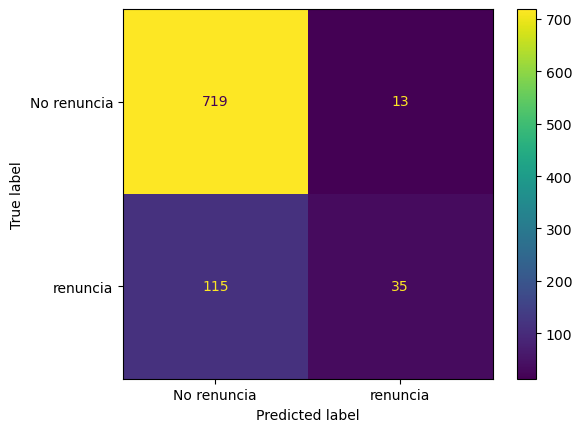

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz= confusion_matrix(y_test, y_pred)
matriz_display = ConfusionMatrixDisplay(confusion_matrix=matriz, display_labels=['No renuncia', 'renuncia'])
matriz_display.plot()
plt.show()

In [ ]:
tn, fp, fn, tp = matriz.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.7291666666666666
Recall: 0.23333333333333334
Especificidad: 0.98224043715847
F1 score: 0.3535353535353536


In [ ]:
# Precision: Un 70 % de las personas que el modelo predijo que iban a renunciar a su trabajo realmente renunciaron, el 30% de las veces el modelo se equivocara cuando predice si un empleado renunciara
# Recall: del total de empleados que renunciaron a su trabajo el modelo es capaz de identificar el 24%
# f1:
#Especificidad: del total de empleados que no renunciaron a su trabajo el modelo es capaz de indetificar el 36%

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))
print("R2: %.2f" % r2_score(y_test, y_pred))

# R2 ajustado
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.14
RMSE 0.38
MAE: 0.14
MAPE: 102122440529943.34
R2: -0.07
R2-adjusted: -0.16


In [ ]:
#El modelo es peor que predecir la media, no esta aprendiendo de los datos

## MODELO BASE CON HIPERPARAMETRO CLASE_WEGHT

In [ ]:
from sklearn.metrics import accuracy_score
X_train_std1=X_train_std.copy()
X_test_std1=X_test_std.copy()
# Entrenamiento del modelo
modelo1 = LogisticRegression(class_weight="balanced",random_state=142)

# Ajustar el modelo a los datos
modelo1.fit(X_train_std1, y_train)

# Desempeño en el entrenamiento
y_train_pred1 = modelo1.predict(X_train_std1)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred1) )

Exactitud en el entrenamiento: 0.746


In [ ]:
y_pred1 = modelo1.predict(X_test_std1)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred1))

Exactitud en el entrenamiento: 0.768


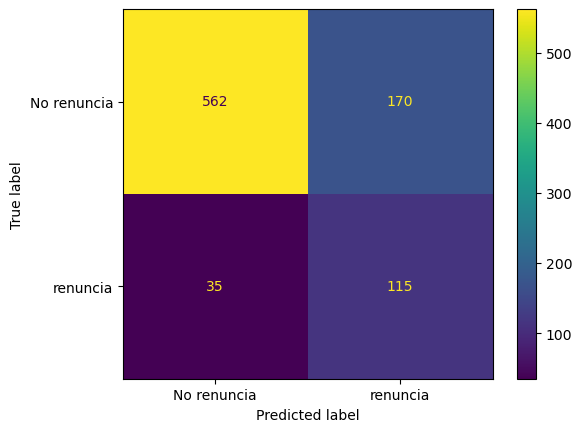

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
matriz1= confusion_matrix(y_test, y_pred1)
matriz_display1 = ConfusionMatrixDisplay(confusion_matrix=matriz1, display_labels=['No renuncia', 'renuncia'])
matriz_display1.plot()
plt.show()

In [ ]:
tn, fp, fn, tp = matriz1.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.40350877192982454
Recall: 0.7666666666666667
Especificidad: 0.76775956284153
F1 score: 0.528735632183908


In [ ]:
# Precision: Un 31 % de las personas que el modelo predijo que iban a renunciar a su trabajo realmente renunciaron, el 69% de las veces el modelo se equivocara cuando predice si un empleado renunciara
# Recall: del total de empleados que renunciaron a su trabajo el modelo es capaz de identificar el 74%
# f1:
#Especificidad: del total de empleados que no renunciaron a su trabajo el modelo es capaz de indetificar el 44%

In [ ]:
# Metricas
print("MSE: %.2f" % mean_squared_error(y_test, y_pred1))
print("RMSE %.2f" % math.sqrt(mean_squared_error(y_test, y_pred1)))
print("MAE: %.2f" % mean_absolute_error(y_test, y_pred1))
print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred1))
print("R2: %.2f" % r2_score(y_test, y_pred1))

# R2 ajustado
r2 = r2_score(y_test, y_pred1)
adj_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test_std1.shape[1]-1)
print("R2-adjusted: %.2f" % adj_r2)

MSE: 0.28
RMSE 0.53
MAE: 0.28
MAPE: 1062073381511409.50
R2: -1.09
R2-adjusted: -1.26


In [ ]:
#regresion logistica
#1 de Arbol
